①比较有违约与无违约行为特征的人群分布。
②探索不同特征的人群收入与负债的分布情况。
③探索不同特征的人群收入与负债的关系。

      age          education       seniority          income     
 Min.   :20.00   Min.   :1.000   Min.   : 0.000   Min.   : 14.0  
 1st Qu.:29.00   1st Qu.:1.000   1st Qu.: 3.000   1st Qu.: 24.0  
 Median :34.00   Median :1.000   Median : 7.000   Median : 34.0  
 Mean   :34.86   Mean   :1.723   Mean   : 8.389   Mean   : 45.6  
 3rd Qu.:40.00   3rd Qu.:2.000   3rd Qu.:12.000   3rd Qu.: 55.0  
 Max.   :56.00   Max.   :5.000   Max.   :31.000   Max.   :446.0  
   debt_rate     credit_card_debt  orther_debt        default      
 Min.   : 0.40   Min.   : 0.010   Min.   : 0.050   Min.   :0.0000  
 1st Qu.: 5.00   1st Qu.: 0.370   1st Qu.: 1.048   1st Qu.:0.0000  
 Median : 8.60   Median : 0.855   Median : 1.985   Median :0.0000  
 Mean   :10.26   Mean   : 1.553   Mean   : 3.058   Mean   :0.2614  
 3rd Qu.:14.12   3rd Qu.: 1.905   3rd Qu.: 3.928   3rd Qu.:1.0000  
 Max.   :41.30   Max.   :20.560   Max.   :27.030   Max.   :1.0000  

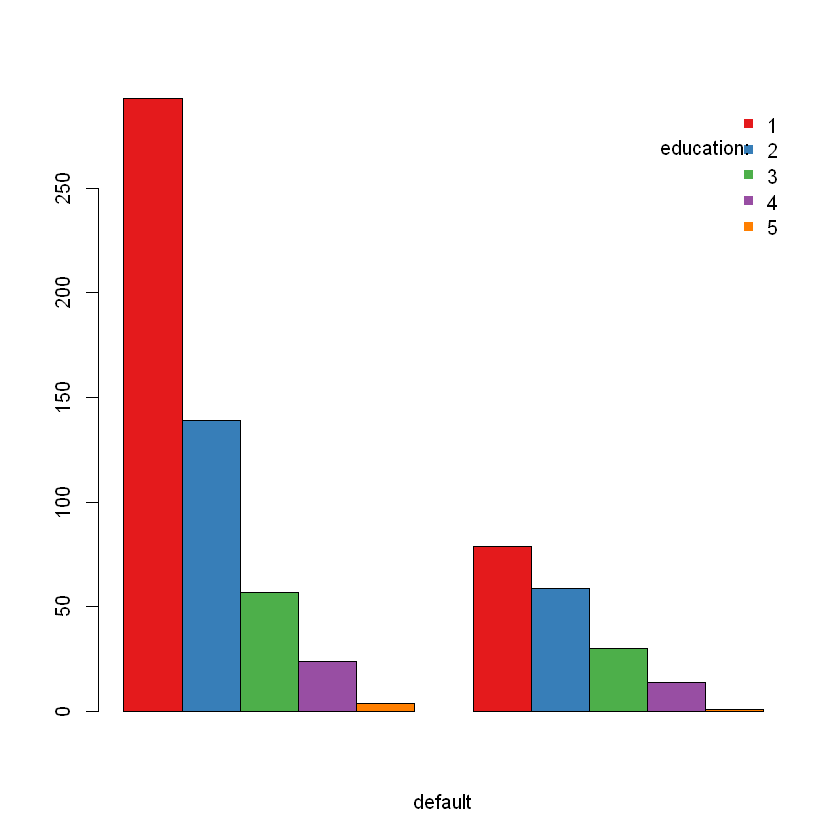

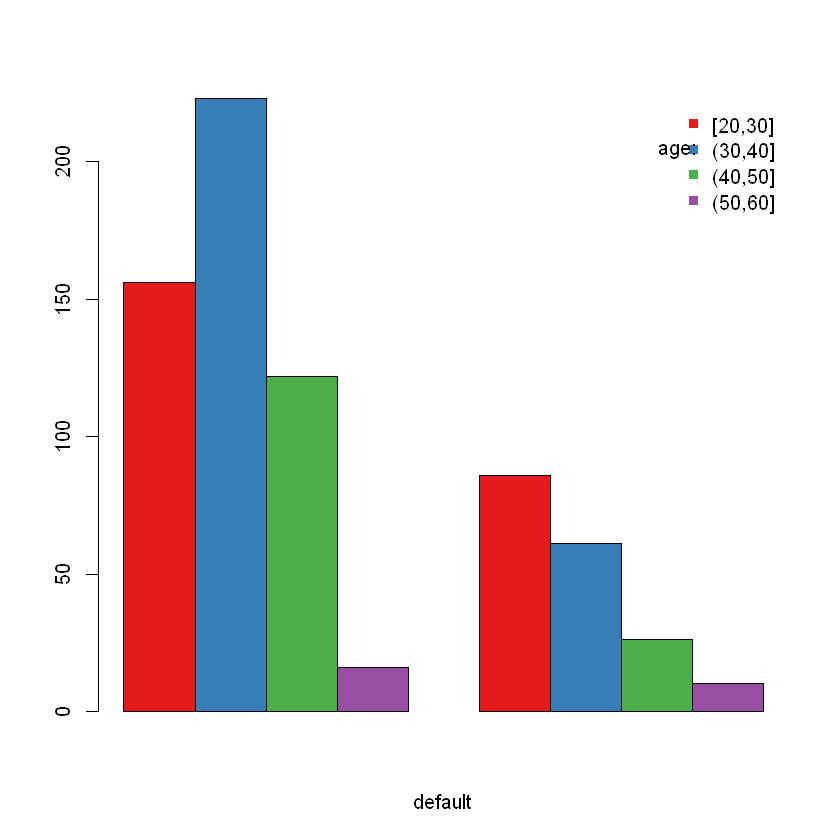

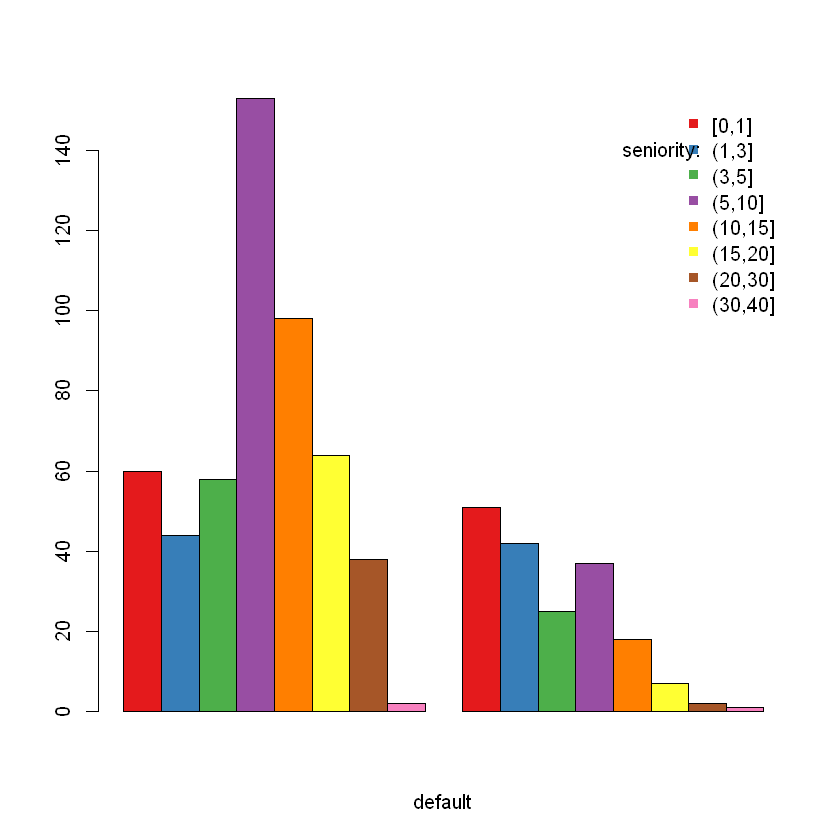

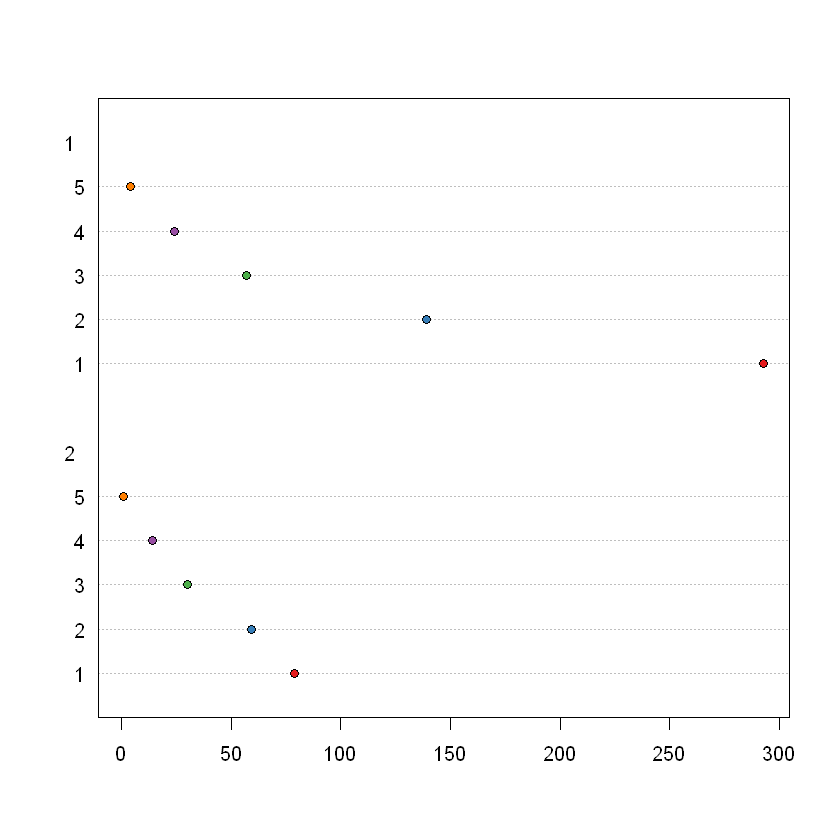

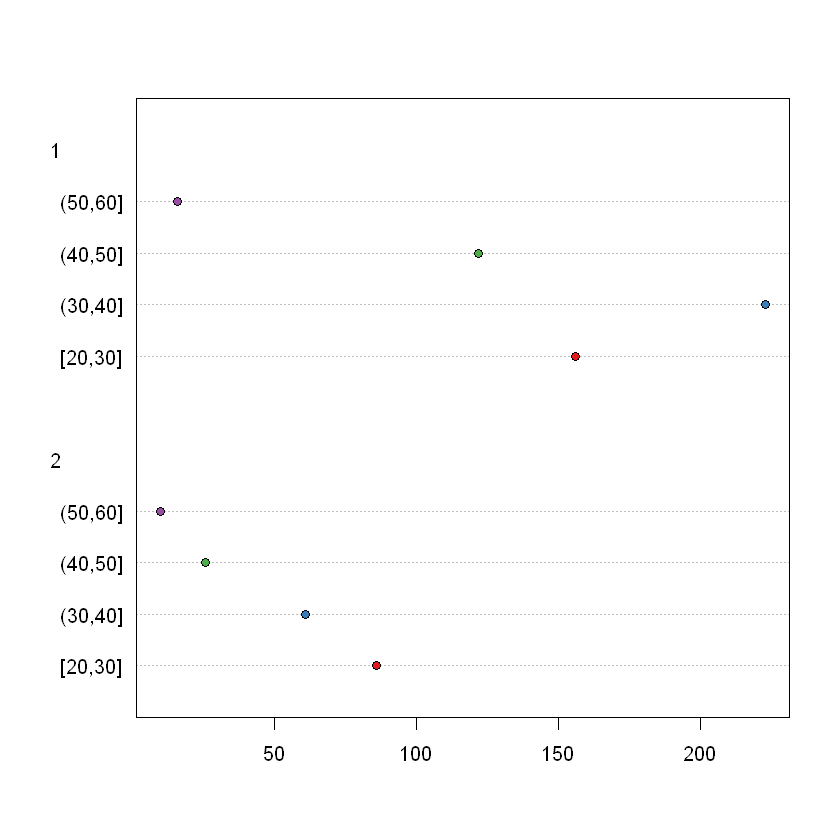

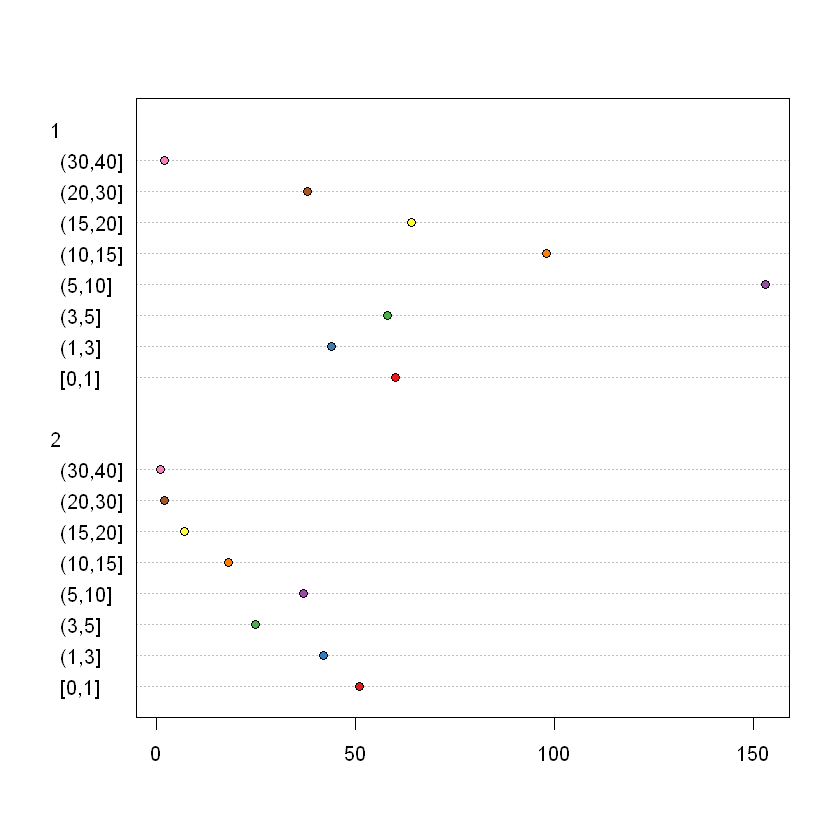

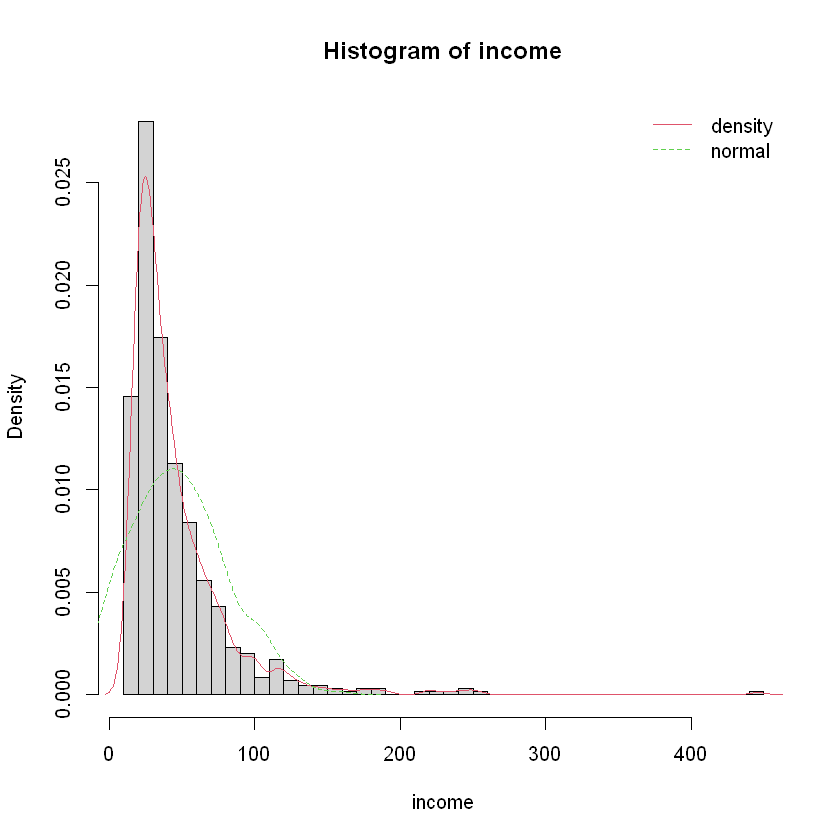

ERROR: Error in library(sm): 不存在叫'sm'这个名字的程辑包


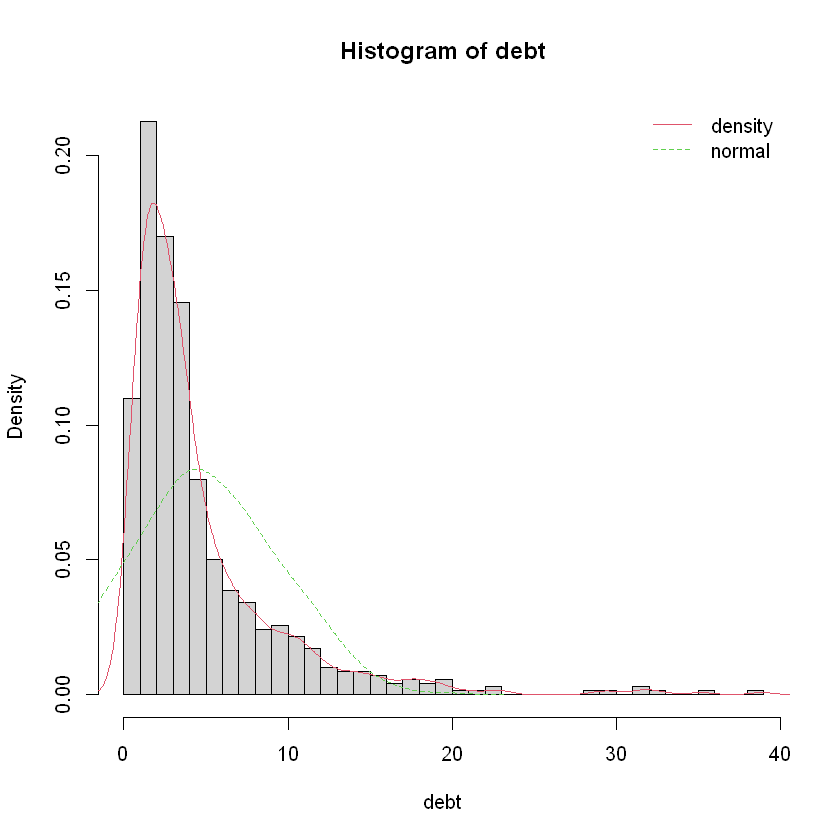

In [1]:
#操作题（1）
# 读取数据
bankloan <- read.csv("bankloan.csv") 
summary(bankloan)

# 数据预处理，调整数据类型，将年龄、工龄分组
bankloan$age_group <- cut(bankloan$age,breaks = paste0(2:6, 0),include.lowest = TRUE)
bankloan$seniority_group <- cut(bankloan$seniority,breaks = c(0, 1, 3, 5, 10, 15, 20, 30, 40),include.lowest = TRUE)
bankloan$education <- factor(bankloan$education)
bankloan$debt <- bankloan$debt_rate / 100 * bankloan$income
attach(bankloan)
#这里有个报错没解决

# 绘制违约与不违约客户的教育的条形图
pal <- RColorBrewer::brewer.pal(8, "Set1")
de_e <- ftable(education, default)
barplot(de_e, col = pal[1:5], beside = TRUE, xlab = "default")
legend("topright", levels(education), pch = 15, col = pal, bty = "n")
text(11, 270, "education:")

# 绘制违约与不违约客户的年龄的条形图
de_a <- ftable(age_group, default)
barplot(de_a, col = pal[1:4], beside = TRUE, xlab = "default")
legend("topright", levels(age_group), pch = 15, col = pal, bty = "n")
text(8.8, 204, "age:")

# 绘制违约与不违约客户的工龄的条形图
de_s <- ftable(seniority_group, default)
barplot(de_s, col = pal[1:8], beside = TRUE, xlab = "default")
legend("topright", levels(seniority_group), pch = 15, col = pal, bty = "n")
text(15.3, 140, "seniority:")

# 绘制违约与不违约客户的年龄、教育和工龄的Cleveland点图
dotchart(de_e, bg = pal[1:5], labels = levels(education))
dotchart(de_a, bg = pal[1:4], labels = levels(age_group))
dotchart(de_s, bg = pal[1:8], labels = levels(seniority_group))


# 绘制不同年龄、教育和工龄的客户收入的直方图
set.seed(1234)
norm_income <- rnorm(1000, mean(income), sd(income))
hist(income, freq = FALSE, breaks = 50)
lines(density(income), col = 2)
lines(density(norm_income), lty = 2, col = 3) 
legend("topright", c("density", "normal"), lty = 1:2, col = 2:3, bty = "n")

# 绘制不同年龄、教育和工龄的客户负债的直方图
norm_debt <- rnorm(1000, mean(debt), sd(debt))
hist(debt, freq = FALSE, breaks = 50)
lines(density(debt), col = 2)
lines(density(norm_debt), lty = 2, col = 3) 
legend("topright", c("density", "normal"), lty = 1:2, col = 2:3, bty = "n")

# 绘制不同年龄、教育和工龄的客户收入的核密度图
library(sm)
sm.density.compare(income, factor(education))
legend("topright", levels(education), lty = 1:5, col = 2:6, bty = "n")
text(450, 0.015, "education:")

sm.density.compare(income, factor(age_group))
legend("topright", levels(age_group), lty = 1:4, col = 2:5, bty = "n")
text(430, 0.026, "age:")

sm.density.compare(income, factor(seniority_group))
legend("topright", levels(seniority_group), lty = 1:8, col = 2:9, bty = "n")
text(425, 0.03, "seniority:")

# 绘制不同年龄、教育和工龄的客户负债的核密度图
sm.density.compare(debt, factor(education))
legend("topright", levels(education), lty = 1:5, col = 2:6, bty = "n")
text(40, 0.125, "education:")

sm.density.compare(debt, factor(age_group))
legend("topright", levels(age_group), lty = 1:4, col = 2:5, bty = "n")
text(38, 0.16, "age:")

sm.density.compare(debt, factor(seniority_group))
legend("topright", levels(seniority_group), lty = 1:8, col = 2:9, bty = "n")
text(37, 0.16, "seniority:")

# 绘制不同年龄、教育和工龄的客户收入的箱线图
boxplot(income ~ education, horizontal = TRUE)
boxplot(income ~ age_group, horizontal = TRUE)
boxplot(income ~ seniority_group, horizontal = TRUE)

# 绘制不同年龄、教育和工龄的客户负债的箱线图
boxplot(debt ~ education, horizontal = TRUE)
boxplot(debt ~ age_group, horizontal = TRUE)
boxplot(debt ~ seniority_group, horizontal = TRUE)

# 根据客户的年龄、教育和工龄对客户收入分组
income_e <- tapply(income, education, function (t) t)
income_a <- tapply(income, age_group, function (t) t)
income_s <- tapply(income, seniority_group, function (t) t)

# 绘制不同年龄、教育和工龄的客户收入的小提琴图
library(vioplot)
vioplot(income_e$`1`, income_e$`2`, income_e$`3`, income_e$`4`, income_e$`5`, 
        names = levels(education), border = "black", col = "light green", rectCol = "blue")

vioplot(income_a$`[20,30]`, income_a$`(30,40]`, income_a$`(40,50]`, 
        income_a$`(50,60]`, names = levels(age_group), border = "black", 
        col = "light green", rectCol = "blue")

vioplot(income_s$`[0,1]`, income_s$`(1,3]`, income_s$`(3,5]`, 
        income_s$`(5,10]`, income_s$`(10,15]`, income_s$`(15,20]`, 
        income_s$`(20,30]`, income_s$`(30,40]`, names = levels(seniority_group), 
        border = "black", col = "light green", rectCol = "blue")

# 根据客户的年龄、教育和工龄对客户负债分组
debt_e <- tapply(debt, education, function (t) t)
debt_a <- tapply(debt, age_group, function (t) t)
debt_s <- tapply(debt, seniority_group, function (t) t)

# 绘制不同年龄、教育和工龄的客户负债的小提琴图
vioplot(debt_e$`1`, debt_e$`2`, debt_e$`3`, debt_e$`4`, debt_e$`5`, 
        names = levels(education), border = "black", col = "light green", rectCol = "blue")

vioplot(debt_a$`[20, 30]`, debt_a$`(30, 40]`, debt_a$`(40, 50]`, debt_a$`(50, 60]`,
        names = levels(age_group), border = "black", col = "light green", rectCol = "blue")
#这个图报的错我暂时还没找到如何解决

vioplot(debt_s$`[0,1]`, debt_s$`(1,3]`, debt_s$`(3,5]`, debt_s$`(5,10]`, 
        debt_s$`(10,15]`, debt_s$`(15,20]`, debt_s$`(20,30]`, debt_s$`(30,40]`, 
        names = levels(seniority_group), border = "black", col = "light green", rectCol = "blue")


# 绘制不同年龄、教育和工龄下客户的收入与负债的散点图
le <- levels(education)
op <- par(mfrow = c(1, 5))
for (i in 1:nlevels(education)) {
  plot(income[education == le[i]], debt[education == le[i]], 
       main = paste("education = ", le[i]), xlab = "income", ylab = "debt")
  abline(lm(debt[education == le[i]] ~ income[education == le[i]]), col = "red")
}
par(op)

la <- levels(age_group)
op <- par(mfrow = c(1, 4))
for (i in 1:nlevels(age_group)) {
  plot(income[age_group == la[i]], debt[age_group == la[i]], 
       main = paste("age_group = ", la[i]), xlab = "income", ylab = "debt")
  abline(lm(debt[age_group == la[i]] ~ income[age_group == la[i]]), col = "red")
}
par(op)

ls <- levels(seniority_group)
op <- par(mfrow = c(1, 4))
for(i in 1:nlevels(seniority_group)){
  plot(income[seniority_group == ls[i]], debt[seniority_group == ls[i]], 
       main = paste("seniority_group = ", ls[i]), xlab = "income", ylab = "debt")
  abline(lm(debt[seniority_group == ls[i]] ~ income[seniority_group == ls[i]]), col = "red")
}
par(op)
